In [ ]:
#@title Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd


In [ ]:
scale = True
elbow = True

In [ ]:
#@title Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
#@title Extracting feature data and target labels from the dataset
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])
true_labels = data['target'].values

In [ ]:
#@title Visualize the data
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#@title Data Preprocessing
# Select only the features for clustering
features = data.drop('target', axis=1).values

# Standardize the data (important for K-means)
if scale == True:
  features = StandardScaler().fit_transform(features)

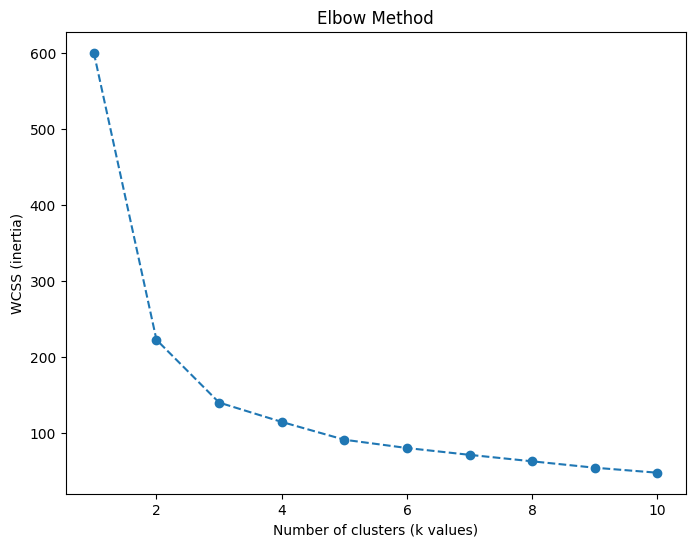

In [ ]:
#@title Determine the optimal number of clusters (K) using the Elbow method

if elbow == True:
  wcss = []  # Within-cluster sum of squares

  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
      kmeans.fit(features)
      wcss.append(kmeans.inertia_)

  # Plot the Elbow method to find the optimal K
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters (k values)')
  plt.ylabel('WCSS (inertia)')
  plt.show()

# Based on the Elbow method, let's choose K=3 (the "elbow" of the plot)

K=3




In [ ]:
#@title Make and Train Model & Make Predictions
# Apply K-means clustering
kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(features)
predicted_labels = kmeans.labels_


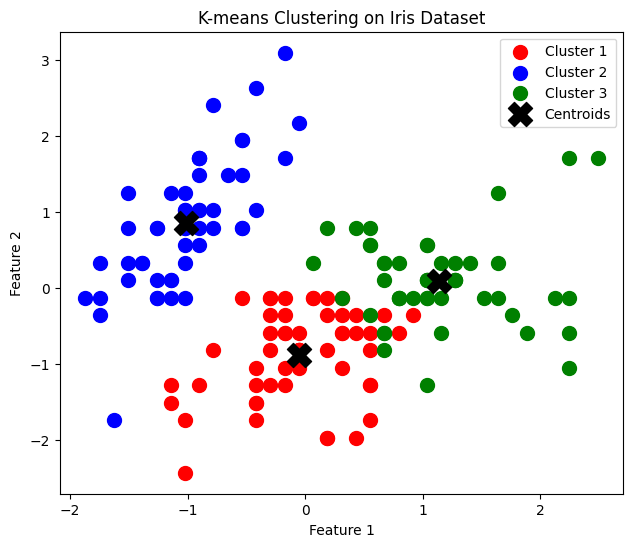

Adjusted Rand Index (ARI) = 0.6201351808870379


In [ ]:
#@title Visualization of Clusters

# Visualize the clusters
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

# Select two features for visualization (e.g., the first two features)
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature

plt.scatter(features[predicted_labels == 0, feature1], features[predicted_labels == 0, feature2], s=100, c='red', label='Cluster 1')
plt.scatter(features[predicted_labels == 1, feature1], features[predicted_labels == 1, feature2], s=100, c='blue', label='Cluster 2')
plt.scatter(features[predicted_labels == 2, feature1], features[predicted_labels == 2, feature2], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, feature1], kmeans.cluster_centers_[:, feature2], s=300, c='black', marker='X',
            label='Centroids')


plt.title('K-means Clustering on Iris Dataset')
plt.xlabel(f'Feature {feature1 + 1}')
plt.ylabel(f'Feature {feature2 + 1}')
plt.legend()

plt.show()

ari = adjusted_rand_score(true_labels, predicted_labels)  # Adjusted Rand Index (ARI)

print('Adjusted Rand Index (ARI) =', ari)


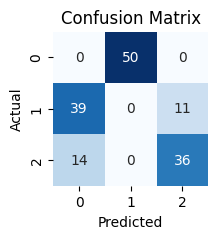

In [ ]:
#@title Confusion Matrix
# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Reflection**

Steps taken to improve the model performance:



*   Standardizing or feature scaling is very important for k-means clustering because it is a distance based approach.
*   K-Means++ is generally recommended over random initialization as it tends to lead to better convergence and better results.

Challenges encountered and potential ways to improve the model further:

*   Choosing the optimal k, sometimes it might not be easy to select the optimal k because the elbow plot may not be defined clearly.
*   After applying one-hot encoding to the dataset, the Adjusted Rand Index(ari) has decreased abruptly, this is because one-hot encoding may not be a suitable featutre for continous features.

* Handling Categorical values if present with appropriate methods might improve model's performance.

